In [1]:
%pip install 'gymnasium'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.6 MB/s eta 0:00:00


In [3]:
## ライブラリのインポート
import pandas as pd  # データ操作と解析のためのPandasライブラリをインポート
import numpy as np  # 数値計算のためのNumPyライブラリをインポート
import matplotlib  # グラフ描画のためのMatplotlibライブラリをインポート
import matplotlib.pyplot as plt  # グラフ描画のためのPyplotモジュールをインポート

matplotlib.use('Agg')  # Matplotlibの描画バックエンドを設定（'Agg'はサーバーサイド描画用）
%matplotlib inline  # Jupyter Notebook上でグラフをインライン表示するための設定
from matplotlib.patches import Patch  # グラフにパッチ（形状）を追加するためのPatchモジュールをインポート
import datetime  # 日付と時間の操作のためのDatetimeライブラリをインポート
import calendar  # カレンダー関連の操作のためのCalendarライブラリをインポート

from gym.utils import seeding  # OpenAI Gymで乱数シードを設定するためのseedingモジュールをインポート
import gym  # 強化学習環境を提供するOpenAI Gymライブラリをインポート
from gym import spaces  # OpenAI Gymで使用されるスペース（状態空間と行動空間）をインポート


UsageError: unrecognized arguments: # Jupyter Notebook上でグラフをインライン表示するための設定


# Reinforcement Learning

Reinforcement learning (RL) is a method by which an agent learns through trial and error within an environment.

Imagine training a dog with treats: the dog (agent) takes actions (exploring), receives rewards (treats) for good choices, and avoids punishments for bad ones.

### Here's a quick breakdown:

* **Agent**: The decision-maker, like the dog in our example.
* **States**: The current status of the agent and the world the agent interacts with.
* **Action**: What the agent does (e.g., move left, right, bark).
* **Reward**: A signal that tells the agent if its action was good (positive reward) or bad (negative reward).

The goal of RL is for the agent to learn an optimal policy, which is a set of rules for choosing the best action in any given situation to maximize its long-term reward.

### Here's an analogy:

Think of playing a video game. You (the agent) explore the environment (the game world), take actions (pressing buttons), and receive rewards (points, health). Over time, you learn the best actions to take to win the game (maximize your reward).

# 強化学習（RL）は、エージェントが環境内で試行錯誤を通じて学習する方法です。

犬におやつで訓練することを想像してみてください。犬（エージェント）は行動を取り（探索し）、良い選択をすると報酬（おやつ）を受け取り、悪い選択をすると罰を避けるようになります。

簡単な説明:
エージェント（Agent）: 意思決定者、例では犬。
状態（States）: エージェントとその相互作用する世界の現在の状態。
行動（Action）: エージェントが取る行動（例: 左に移動、右に移動、吠える）。
報酬（Reward）: エージェントにその行動が良い（正の報酬）か悪い（負の報酬）かを知らせる信号。
RLの目標は、エージェントが最適なポリシーを学ぶことであり、これはあらゆる状況で最良の行動を選択するためのルールセットであり、長期的な報酬を最大化することです。

アナロジー:
ビデオゲームをプレイすることを考えてみてください。あなた（エージェント）は環境（ゲームの世界）を探索し、行動を取り（ボタンを押す）、報酬を受け取ります（ポイントやヘルス）。時間が経つにつれて、ゲームに勝つための最良の行動（報酬を最大化する）を学びます。


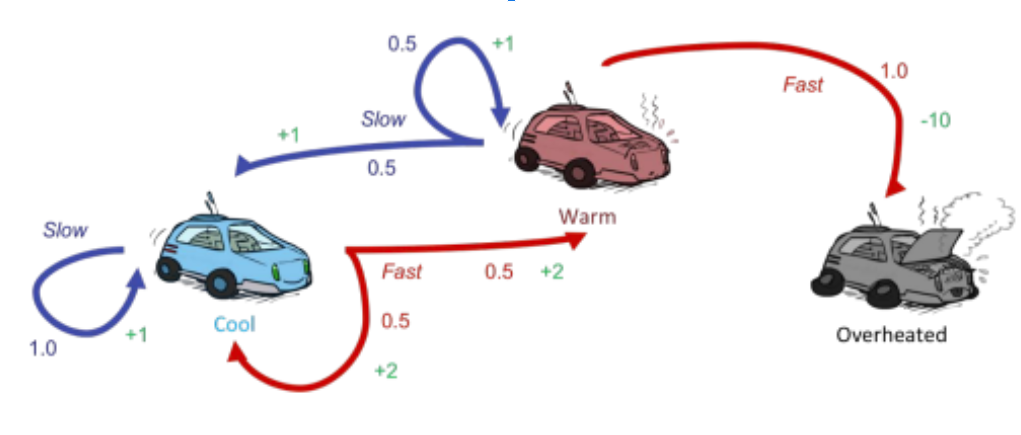

In the example, we have the following states:

* **Cool**
* **Warm**
* **Overheated**

We can take the following actions:

* **Going Fast**
* **Going Slow**

These actions cause transitions between states with certain probabilities:

* Going fast while warm has a 50% chance to become overheated and a 50% chance to remain warm.
* Going slow while warm has a 50% chance to become cool and a 50% chance to remain warm.
* Going slow while cool has a 100% chance to remain cool.
* Going fast while cool has a 50% chance to become warm and a 50% chance to remain cool.

Given a state and an action, you receive a reward:

* Being cool and going slow gives us 1 point as a reward.
* Being cool and going fast gives us 2 points as a reward.
* Being warm and going fast gives us 2 points as a reward.
* Being warm and going slow gives us 1 point as a reward.
* Being overheated takes away 10 points and ends the game.

The focus of reinforcement learning is to maximize the reward under certain constraints such as the number of actions, episodes, and other parameters.


以下が、例で挙げられた状態、行動、遷移、報酬を日本語に翻訳したものです：
例では、以下の状態があります：

涼しい
暖かい
過熱

以下の行動を取ることができます：

速く進む
ゆっくり進む

これらの行動は、一定の確率で状態間の遷移を引き起こします：

暖かい状態で速く進むと、50%の確率で過熱状態になり、50%の確率で暖かい状態のままです。
暖かい状態でゆっくり進むと、50%の確率で涼しい状態になり、50%の確率で暖かい状態のままです。
涼しい状態でゆっくり進むと、100%の確率で涼しい状態のままです。
涼しい状態で速く進むと、50%の確率で暖かい状態になり、50%の確率で涼しい状態のままです。

状態と行動に応じて、以下の報酬を受け取ります：

涼しい状態でゆっくり進むと、1ポイントの報酬を得ます。
涼しい状態で速く進むと、2ポイントの報酬を得ます。
暖かい状態で速く進むと、2ポイントの報酬を得ます。
暖かい状態でゆっくり進むと、1ポイントの報酬を得ます。
過熱状態になると、10ポイントを失い、ゲームが終了します。

強化学習の焦点は、行動回数、エピソード数、その他のパラメータなどの特定の制約の下で報酬を最大化することです。

# Solving Blackjack with Q-Learning

Blackjack is a highly popular casino card game known for being potentially beatable under specific conditions.

In this version, we use an infinite deck, meaning we draw the cards but we don't replace them, so card counting won't be a viable strategy in our simulation.

**Goal**: To win, your card sum should be greater than the dealer's without exceeding 21.

**Actions**: Agents can choose between two actions:
 - **Stand (0)**: The player takes no more cards.
 - **Hit (1)**: The player will be given another card.

**Approach**: To solve this environment, you can choose your favorite discrete RL algorithm. The presented solution uses *Q-learning*.


# Q-Learningでブラックジャックを解く

ブラックジャックは、特定の条件下で勝つ可能性があるカジノカードゲームとして非常に人気があります。

このバージョンでは、無限デッキを使用します。つまり、カードを引いてもデッキに戻さないため、カードカウントはシミュレーションにおいて有効な戦略ではありません。

**目標**: 勝つためには、カードの合計がディーラーの合計を上回り、21を超えないようにする必要があります。

**行動**: エージェントは次の2つの行動を選択できます:
 - **スタンド (0)**: プレイヤーはこれ以上カードを引きません。
 - **ヒット (1)**: プレイヤーはもう1枚カードを引きます。

**アプローチ**: この環境を解決するために、お気に入りの離散的なRLアルゴリズムを選択できます。ここで提示する解決策は、*Q-learning*を使用しています。



## Imports and Environment Setup



In [3]:
from collections import defaultdict  # デフォルト値を持つ辞書を作成するためのdefaultdictをインポート
import matplotlib.pyplot as plt  # グラフ描画のためのMatplotlibのPyplotモジュールをインポート
import numpy as np  # 数値計算のためのNumPyライブラリをインポート
import seaborn as sns  # データ可視化のためのSeabornライブラリをインポート
from tqdm import tqdm  # 進行状況を表示するためのTQDMライブラリをインポート
import gymnasium as gym  # 強化学習環境を提供するGymnasiumライブラリをインポート

# ブラックジャック環境を作成します。
env = gym.make("Blackjack-v1", sab=True)  # GymnasiumのBlackjack-v1環境を作成し、sabオプションを有効にします


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Observing the Environment

We use `env.reset()` to start an episode.

An episode in reinforcement learning represents a complete sequence of interactions between the agent and the environment, starting from the initial state and ending when a terminal state is reached. In the context of our Blackjack game, an episode begins when the game starts and ends when the game concludes with a win, loss, or bust.

We usually also set `done = False`. This variable will be useful later to check if a game has terminated (i.e., the player wins or loses).


In [4]:
# 環境をリセットして最初の観測値を取得します
done = False  # エピソードの終了状態を示すフラグを初期化します（Falseに設定）

# 環境をリセットして、初期の観測値と追加情報を取得します
observation, info = env.reset()

# 最初の観測値と追加情報を表示します
observation, info


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((16, 4, 1), {})

Note that our observation is a 3-tuple consisting of three values:

- **Player's current sum**: The total value of the player's cards.
- **Value of the dealer's face-up card**: The value of the card that the dealer shows.
- **Boolean indicating a usable ace**: A flag indicating whether the player holds a usable ace (an ace is usable if it counts as 11 without busting).

## Executing an Action

After receiving our first observation, we will use the `env.step(action)` function to interact with the environment. This function takes an action as input and executes it in the environment. Because the action changes the state of the environment, it returns four useful variables to us:

- **next_state**: The observation that the agent will receive after taking the action.
- **reward**: The reward that the agent will receive after taking the action.
- **terminated**: A boolean variable indicating whether the environment has terminated.
- **truncated**: A boolean variable indicating whether the episode ended by early truncation, i.e., a time limit was reached.
- **info**: A dictionary that might contain additional information about the environment.

The `next_state`, `reward`, `terminated`, and `truncated` variables are self-explanatory, but the `info` variable requires some additional explanation. This variable contains a dictionary that might have extra information about the environment, but in the Blackjack-v1 environment, you can ignore it. For example, in Atari environments, the info dictionary has an `ale.lives` key that tells us how many lives the agent has left. If the agent has 0 lives, then the episode is over.

Note that it is not a good idea to call `env.render()` in your training loop because rendering slows down training significantly. Instead, try to build an extra loop to evaluate and showcase the agent after training.


In [5]:
# 有効な行動からランダムに行動をサンプルします
done = False  # エピソードの終了状態を示すフラグを初期化します（Falseに設定）
observation, info = env.reset()  # 環境をリセットして、初期の観測値と追加情報を取得します
action = env.action_space.sample()  # 環境の行動空間からランダムに行動をサンプルします

# 環境内で行動を実行し、環境からの情報を受け取ります
observation, reward, terminated, truncated, info = env.step(action)  
# 観測値、報酬、エピソードの終了状態（terminated）、トランケーション状態（truncated）、追加情報を取得します

# 取得した情報を表示します
print(f'Obs: {observation}, Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}')


Obs: (12, 10, 0), Reward: 0.0, Terminated: False, Truncated: False, Info: {}


In [6]:
# ブラックジャック環境を初期化します
# "Blackjack-v1"はブラックジャックをプレイするための特定の環境です
# `sab=True`は簡略化されたルールを持つブラックジャックのバリアントを有効にします
env = gym.make("Blackjack-v1", sab=True)

# 3回ブラックジャックのゲームをプレイします
for k in range(3):
    print(f"Game {k+1}")  # 現在のゲーム番号を表示します

    # ゲームが終了したかどうかを示す`done`フラグを初期化します
    done = False

    # 新しいゲームを開始するために環境をリセットします
    # `observation`にはゲームの初期状態が含まれます
    # `info`は環境に関する追加情報を提供します
    observation, info = env.reset()

    # ゲームが終了するまで続けます
    while not done:
        # 有効な行動のセットからランダムに行動をサンプルします
        action = env.action_space.sample()

        # 環境内で行動を実行します
        # `env.step(action)`メソッドはいくつかの値を返します:
        # - `observation`: 行動を取った後の新しいゲーム状態
        # - `reward`: 行動を取った後に受け取る報酬
        # - `terminated`: ゲームが終了したかどうか（勝利/敗北）
        # - `truncated`: ゲームが途中で中断されたかどうか
        # - `info`: 環境に関する追加情報
        observation, reward, terminated, truncated, info = env.step(action)

        # ゲームが終了したかどうかを示す`done`フラグを更新します
        done = terminated

        # 現在の状態、報酬、およびゲームのステータスを表示します
        print(f'Obs: {observation}, Reward: {reward}, Terminated: {terminated}, Truncated: {truncated}, Info: {info}')

    # ゲーム間の可読性を向上させるために改行を表示します
    print("\n")


Game 1
Obs: (25, 10, 0), Reward: -1.0, Terminated: True, Truncated: False, Info: {}


Game 2
Obs: (30, 6, 0), Reward: -1.0, Terminated: True, Truncated: False, Info: {}


Game 3
Obs: (12, 10, 0), Reward: 0.0, Terminated: False, Truncated: False, Info: {}
Obs: (15, 10, 0), Reward: 0.0, Terminated: False, Truncated: False, Info: {}
Obs: (15, 10, 0), Reward: -1.0, Terminated: True, Truncated: False, Info: {}




## Building an Agent

First, we’ll need some functions for picking an action and updating the agent's action values.

To encourage the agent to explore the environment, one effective strategy is the epsilon-greedy method.

In this approach, the agent selects a random action with a probability of epsilon, and with a probability of $1 - epsilon$, it chooses the action that is currently considered the best.

This balance allows the agent to both explore new actions and exploit known rewarding actions.


In [7]:
# 必要なライブラリをインポート
import numpy as np
from collections import defaultdict

# BlackjackAgentクラスを定義
class BlackjackAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """
        指定されたパラメータでBlackjackAgentを初期化します。

        パラメータ:
        - learning_rate: エージェントが知識を更新する速度。
        - initial_epsilon: ランダム行動を選択する初期確率。
        - epsilon_decay: epsilonが減少する速度。
        - final_epsilon: epsilonが到達可能な最小値。
        - discount_factor: 未来の報酬を割引する係数。
        """
        # すべての状態-行動ペアのQ値をゼロで初期化
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        # 学習率、割引率、および探索パラメータを設定
        self.lr = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # 訓練エラーを追跡するリスト
        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        epsilonの確率でランダムな行動を返し、それ以外の確率で最良の行動を返して探索を確保します。

        パラメータ:
        - obs: 状態のタプル（プレイヤーの合計、ディーラーの表向きカード、使えるエース）。

        戻り値:
        - action: 取るべき行動（0はスタンド、1はヒット）。
        """
        # epsilonの確率でランダムな行動を返して環境を探索
        if np.random.random() < self.epsilon:
            return env.action_space.sample()
        # (1 - epsilon)の確率で最適な行動を返す（利用）
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """
        行動のQ値を更新します。

        パラメータ:
        - obs: 状態のタプル（プレイヤーの合計、ディーラーの表向きカード、使えるエース）。
        - action: 取った行動（0はスタンド、1はヒット）。
        - reward: 行動後に受け取る報酬。
        - terminated: エピソードが終了したかどうかを示すブール値。
        - next_obs: 次の状態のタプル（プレイヤーの合計、ディーラーの表向きカード、使えるエース）。
        """
        # 未来のQ値を計算
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])

        # 時間的差分を計算
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        # 現在の状態-行動ペアのQ値を更新
        self.q_values[obs][action] += self.lr * temporal_difference

        # 時間的差分を訓練エラーリストに追加
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """
        時間と共により多くの利用を奨励するためにepsilonを減少させます。
        """
        # epsilonを減少させ、最終的なepsilon値を下回らないようにします
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)


To train the agent, we will let it play one episode (a complete game is called an episode) at a time and then update its Q-values after each episode. The agent will need to experience many episodes to explore the environment sufficiently.

Now, we should be ready to build the training loop.


In [8]:
# ハイパーパラメータ
learning_rate = 0.01
# エージェントがQ値を更新する速度。
# 低い値は学習が遅くなりますが、より安定して潜在的に良い結果をもたらすことがあります。
# しかし、学習率が低すぎるとエージェントが効果的に学習するのに時間がかかりすぎるかもしれません。

n_episodes = 100_000
# エージェントが訓練中にプレイするエピソード（ゲーム）の総数。
# エピソードの数が多いほど学習が進みますが、訓練時間が増加します。

start_epsilon = 1.0
# ランダムな行動を選択する初期確率（探索）。
# 高いepsilon値で開始することにより、環境の探索を促進します。

epsilon_decay = start_epsilon / (n_episodes / 2)
# epsilonが時間とともに減少する速度。
# この値は、訓練期間の半分の間に探索が線形に減少し、
# 徐々に最適行動（既知の最善行動）の選択にシフトすることを保証します。

final_epsilon = 0.1
# epsilonが到達可能な最小値。
# これにより、訓練の終わりに向かっても、エージェントが環境を時折探索することを保証し、
# 過度に固定されてより良い行動を見逃すことを防ぎます。

# 指定されたハイパーパラメータでBlackjackAgentを初期化
agent = BlackjackAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

# エピソード統計を記録するために環境をラップ
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)

# 訓練ループ
for episode in tqdm(range(n_episodes)):
    # 新しいエピソードを開始するために環境をリセット
    obs, info = env.reset()
    done = False

    # 1つのエピソードをプレイ
    while not done:
        # エージェントのポリシーを使用して行動を選択
        action = agent.get_action(obs)

        # 行動を実行し、その結果を観察
        next_obs, reward, terminated, truncated, info = env.step(action)

        # 観察された報酬と次の状態でエージェントを更新
        agent.update(obs, action, reward, terminated, next_obs)

        # エピソードが終了したかどうかを確認し、現在の観測を更新
        done = terminated or truncated
        obs = next_obs

    # 各エピソード後にepsilonを減少させ、時間とともに探索を減少させる
    agent.decay_epsilon()


The current hyperparameters are set to quickly train a decent agent. If you want to converge to the optimal policy, try increasing the number of episodes (`n_episodes`) by 10x and lowering the learning rate (e.g., to 0.001).


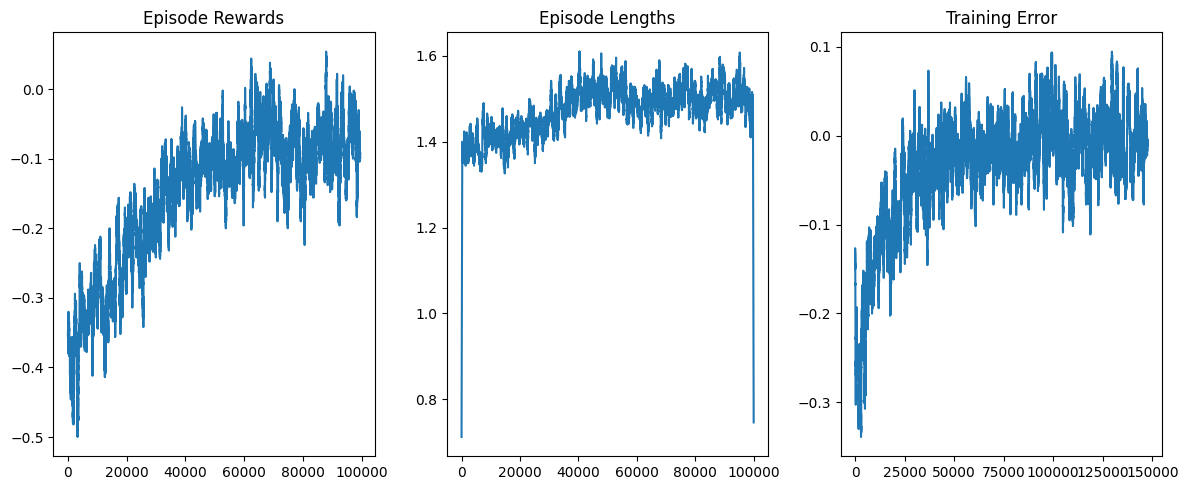

In [11]:
# 訓練統計のプロット
# 移動平均のためのローリング長を定義
rolling_length = 500

# 3列のサブプロットを作成
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

# エピソード報酬のプロット
axs[0].set_title("Episode Rewards")  # 最初のサブプロットのタイトルを設定
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
# エピソード報酬の移動平均を計算
# np.convolve() はウィンドウとしての1の畳み込み演算を適用するために使用されます
# np.array(env.return_queue).flatten() はリターンキューをフラットなnumpy配列に変換
# np.ones(rolling_length) は移動平均のための1のウィンドウを作成
# mode="valid" はウィンドウが完全に適合する場所でのみ移動平均を計算
# 結果はローリング長で割られて平均を得る
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)  # エピソード報酬の移動平均をプロット

# エピソード長のプロット
axs[1].set_title("Episode Lengths")  # 2番目のサブプロットのタイトルを設定
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
# エピソード長の移動平均を計算
# np.convolve() はウィンドウとしての1の畳み込み演算を適用するために使用されます
# np.array(env.length_queue).flatten() は長さキューをフラットなnumpy配列に変換
# np.ones(rolling_length) は移動平均のための1のウィンドウを作成
# mode="same" は出力が入力と同じ長さであることを保証
# 結果はローリング長で割られて平均を得る
axs[1].plot(range(len(length_moving_average)), length_moving_average)  # エピソード長の移動平均をプロット

# 訓練エラーのプロット
axs[2].set_title("Training Error")  # 3番目のサブプロットのタイトルを設定
training_error_moving_average = (
    np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
    / rolling_length
)
# 訓練エラーの移動平均を計算
# np.convolve() はウィンドウとしての1の畳み込み演算を適用するために使用されます
# np.array(agent.training_error) は訓練エラーリストをnumpy配列に変換
# np.ones(rolling_length) は移動平均のための1のウィンドウを作成
# mode="same" は出力が入力と同じ長さであることを保証
# 結果はローリング長で割られて平均を得る
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)  # 訓練エラーの移動平均をプロット

# レイアウトを調整してプロットを表示
plt.tight_layout()  # サブプロットが重ならないようにレイアウトを調整
plt.show()  # プロットを表示


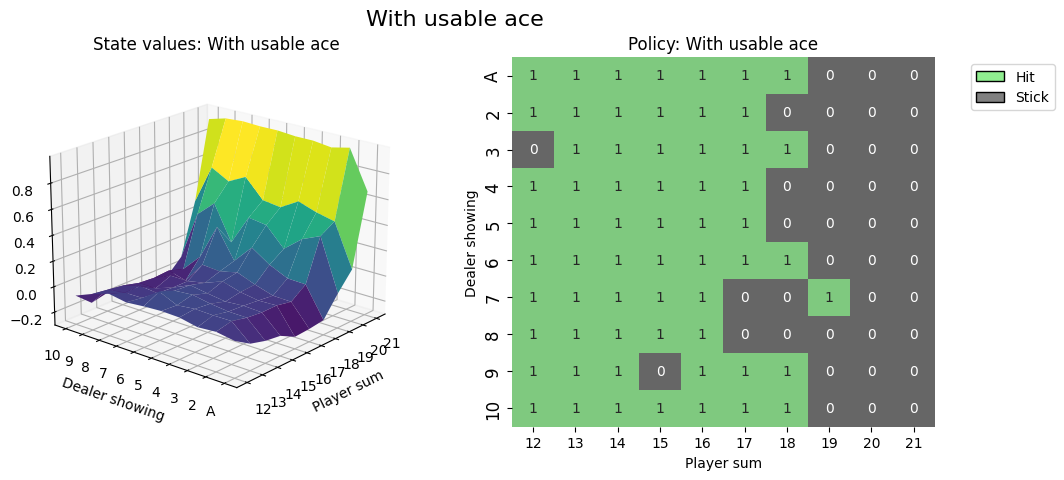

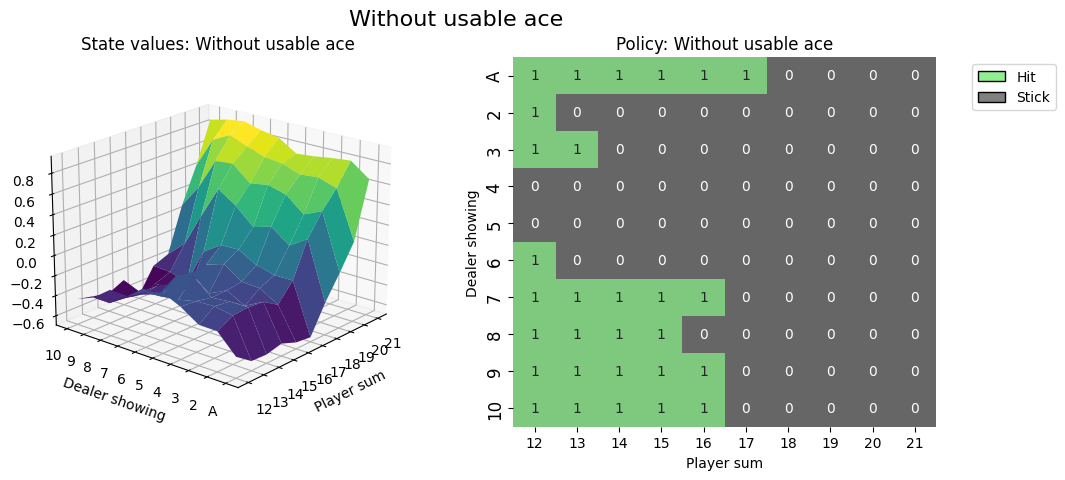

In [12]:
# ポリシーの理解
def create_grids(agent, usable_ace=False):
    """エージェントに基づいて価値グリッドとポリシーグリッドを作成します。"""
    # 状態-行動値を状態値に変換し、観測値から行動へのマッピングを行うポリシー辞書を構築
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))  # 各状態の最大Q値を取得
        policy[obs] = int(np.argmax(action_values))  # 各状態の最高のQ値を持つ行動を取得

    # プレイヤーのカウントとディーラーのカウントのメッシュグリッドを作成
    player_count, dealer_count = np.meshgrid(
        np.arange(12, 22),  # プレイヤーのカウント
        np.arange(1, 11)    # ディーラーの表向きカード
    )

    # プロット用の価値グリッドを作成
    value = np.apply_along_axis(
        lambda obs: state_value[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count])
    )
    value_grid = player_count, dealer_count, value

    # プロット用のポリシーグリッドを作成
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count])
    )
    return value_grid, policy_grid

def create_plots(value_grid, policy_grid, title: str):
    """価値グリッドとポリシーグリッドを使用してプロットを作成します。"""
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    # 状態価値のプロット
    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="viridis",
        edgecolor="none"
    )
    plt.xticks(range(12, 22), range(12, 22))
    plt.yticks(range(1, 11), ["A"] + list(range(2, 11)))
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=14, rotation=90)
    ax1.view_init(20, 220)

    # ポリシーのプロット
    ax2 = fig.add_subplot(1, 2, 2)
    sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False, ax=ax2)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # 凡例を追加
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig

# 使用可能なエース（エースを11としてカウント）の状態価値とポリシー
value_grid, policy_grid = create_grids(agent, usable_ace=True)
fig1 = create_plots(value_grid, policy_grid, title="With usable ace")
plt.show()

# 使用可能なエースなし（エースを1としてカウント）の状態価値とポリシー
value_grid, policy_grid = create_grids(agent, usable_ace=False)
fig2 = create_plots(value_grid, policy_grid, title="Without usable ace")
plt.show()


# RL for finance

# Multi-Asset Market - Environment

Considering the stochastic and interactive nature of automated stock trading tasks, a financial task is modeled as a Markov Decision Process (MDP) problem. The training process involves observing stock price changes, taking actions, and calculating rewards to allow the agent to adjust its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy that maximizes rewards over time.

Our trading environments, based on the OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

マルチアセット市場 - 環境
自動株式取引タスクの確率的かつインタラクティブな性質を考慮して、金融タスクはマルコフ決定過程（MDP）問題としてモデル化されます。訓練プロセスでは、株価の変動を観察し、行動を取り、報酬を計算することで、エージェントが戦略を調整できるようにします。エージェントは環境と相互作用することによって、時間をかけて報酬を最大化する取引戦略を導き出します。

OpenAI Gymフレームワークに基づく我々の取引環境は、時間駆動型シミュレーションの原則に従って実際の市場データを用いてライブ株式市場をシミュレートします。

Let's now try to conceptualize what we previously learned with the Blackjack game applied to our trading strategy problem.

Remember, in order to create a RL (Reinforcement Learning) agent, we need four things:

- A state space: This represents the given values of our environment at a certain point in time.    
- Actions: These are the actions we are able to perform given a state.
- Step function: It is what defines the next state after an action has been taken
- A reward function: This is the function we want to maximize by choosing the best action in a given state.

ブラックジャックのゲームで学んだことを、取引戦略の問題に適用して概念化してみましょう。

強化学習（RL）エージェントを作成するためには、以下の4つが必要です：

- **状態空間**: これは、ある時点における環境の値を表します。
- **行動**: これは、特定の状態において実行可能な行動です。
- **ステップ関数**: これは、行動が取られた後の次の状態を定義するものです。
- **報酬関数**: これは、特定の状態で最適な行動を選択することで最大化したい関数です。

このようにして、エージェントは環境と相互作用しながら、報酬を最大化するための最適な取引戦略を学習します。


### Excercise: Define the states of a trading portfolio, notice we have several factors here as the money invested in each asset, the values of the assets themselves, the money that has not been invested, etc.

Give a description of each one of them and explain its importance

### 演習: トレーディング ポートフォリオの状態を定義します。各資産に投資された金額、資産自体の価値、投資されていない金額など、いくつかの要素があることに注目してください。

それぞれの要素について説明し、その重要性を説明してください。

### Solution

The states are going to be the following:

- Cash Available for Investment (Left)

    Description: This state represents the amount of cash that is available and has not yet been invested in any assets.

    Importance: It determines the liquidity of the portfolio and the ability to seize new investment opportunities.

- Investment per Asset

    Description: This state details the amount of money invested in each individual asset within the portfolio.

    Importance: It helps the RL agent understand the distribution of investments across different assets, aiding in decisions about rebalancing or further investment.

- Check limit orders:

    Description: This state involves monitoring any limit orders that have been placed to buy or sell assets at specified prices.

    Importance: It ensures that the agent is aware of pending orders that could impact the portfolio’s composition and liquidity. Managing these orders effectively is crucial for executing strategic trades at desired price points.


- Asset Value

    Description: This state captures the current market value of each asset in the portfolio.

    Importance: It provides real-time data on the performance of each asset, essential for evaluating potential returns and risks.

- Total Portfolio Value (Total)

    Description: This state is the sum of the cash available and the total market value of all assets in the portfolio.
    
    Importance: It gives a comprehensive view of the portfolio’s worth, helping in assessing the overall financial health and growth. It also can be set to be the trigger for ending a simulation, setting a certain threshold of the value, for example if the value is below certain margin.

- Other Asset Indicators

    Description: These states include additional relevant indicators for each asset, such as the cumulative growth rate, volatility, dividend yield, and any other pertinent metrics.

    Importance: These indicators provide a deeper insight into the characteristics and potential of each asset, supporting more nuanced decision-making.


状態は次のようになります:

- **投資可能な現金 (Cash Available for Investment, Left)**

  - **説明**: この状態は、まだどの資産にも投資されていない利用可能な現金の額を表します。
  - **重要性**: ポートフォリオの流動性や新しい投資機会を捉える能力を決定します。

- **資産ごとの投資額 (Investment per Asset)**

  - **説明**: この状態は、ポートフォリオ内の各資産に投資された金額の詳細を示します。
  - **重要性**: 強化学習エージェントが異なる資産への投資配分を理解するのに役立ち、リバランスや追加投資の判断を支援します。

- **指値注文の確認 (Check limit orders)**

  - **説明**: この状態は、特定の価格で資産を買うまたは売るために設定された指値注文を監視することを含みます。
  - **重要性**: エージェントがポートフォリオの構成と流動性に影響を与える保留中の注文を把握することを保証します。これらの注文を効果的に管理することは、希望する価格で戦略的取引を実行するために重要です。

- **資産価値 (Asset Value)**

  - **説明**: この状態は、ポートフォリオ内の各資産の現在の市場価値をキャプチャします。
  - **重要性**: 各資産のパフォーマンスに関するリアルタイムデータを提供し、潜在的なリターンとリスクを評価するために不可欠です。

- **総ポートフォリオ価値 (Total Portfolio Value, Total)**

  - **説明**: この状態は、利用可能な現金とポートフォリオ内のすべての資産の総市場価値の合計です。
  - **重要性**: ポートフォリオの総価値を包括的に把握し、全体的な財務状況や成長を評価するのに役立ちます。また、シミュレーションの終了トリガーとして設定することもでき、例えば価値が特定のマージンを下回った場合にシミュレーションを終了するなどです。

- **その他の資産指標 (Other Asset Indicators)**

  - **説明**: これらの状態は、各資産の累積成長率、ボラティリティ、配当利回り、その他関連する指標などの追加の重要な指標を含みます。
  - **重要性**: これらの指標は各資産の特性や潜在能力についてより深い洞察を提供し、より微細な意思決定を支援します。


### Excercise: Define what actions can the agent can take, thnik of the actions as something an human could perform, stop loss, sell, buy, set margins, lever, etc.

### 演習: エージェントが実行できるアクションを定義し、そのアクションを人間が実行できるものとして考えます (損失の停止、売却、購入、マージンの設定、レバレッジなど)。

### Solution

- Buy

    Description: Purchase a specified amount of a particular asset.
    
    Importance: This action allows the agent to increase its position in assets it believes will appreciate in value.

- Sell

    Description: Sell a specified amount of a particular asset.

    Importance: This action helps the agent to realize gains or cut losses on underperforming assets.

- Hold

    Description: Maintain the current position in an asset without buying or selling.
    
    Importance: This action helps to minimize transaction costs and maintain positions in assets that are expected to perform well in the future.

- Set Stop Loss

    Description: Set a stop-loss order to sell an asset if its price falls below a specified level.
    
    Importance: This action helps to limit potential losses from an asset that is declining in value.

- Set Stop Limit

    Description: Set a stop-limit order to sell an asset if its price falls below a specified level and then reaches a certain limit price.
    
    Importance: This action provides more control over the selling price to avoid sharp declines.

- Set Margins

    Description: Adjust the margin requirements for leveraged positions.
    
    Importance: This action helps to manage the leverage and risk levels of the portfolio.

- Leverage

    Description: Use borrowed funds to increase the size of an investment.

    Importance: This action can amplify returns but also increases risk.


- Swap

    Description: Exchange one asset for another within the portfolio.
    Importance: This action helps to rebalance the portfolio based on changing market conditions and asset performance.

- Fund

    Description: Add more money to the initial investment, increasing the total capital available for investing.
    
    Importance: This action allows the agent to take advantage of new investment opportunities or reinforce existing positions by increasing the overall investment capital.


- **買い (Buy)**

  - **説明**: 特定の資産を指定量購入する。
  - **重要性**: エージェントが価値が上がると信じる資産のポジションを増やすことができる。

- **売り (Sell)**

  - **説明**: 特定の資産を指定量売却する。
  - **重要性**: エージェントが利益を確定するか、パフォーマンスの悪い資産の損失を最小限に抑えるのに役立つ。

- **ホールド (Hold)**

  - **説明**: 資産の現在のポジションを保持し、売買を行わない。
  - **重要性**: 取引コストを最小限に抑え、将来的にパフォーマンスが期待される資産のポジションを維持するのに役立つ。

- **ストップロス設定 (Set Stop Loss)**

  - **説明**: 資産の価格が指定レベルを下回った場合に資産を売却するストップロス注文を設定する。
  - **重要性**: 価値が下がる資産からの潜在的な損失を制限するのに役立つ。

- **ストップリミット設定 (Set Stop Limit)**

  - **説明**: 資産の価格が指定レベルを下回り、その後一定のリミット価格に達した場合に資産を売却するストップリミット注文を設定する。
  - **重要性**: 急激な価格下落を避けるために売却価格をよりコントロールすることができる。

- **マージン設定 (Set Margins)**

  - **説明**: レバレッジポジションのマージン要件を調整する。
  - **重要性**: ポートフォリオのレバレッジとリスクレベルを管理するのに役立つ。

- **レバレッジ (Leverage)**

  - **説明**: 借入資金を使用して投資の規模を拡大する。
  - **重要性**: リターンを増幅する可能性があるが、リスクも増加する。

- **スワップ (Swap)**

  - **説明**: ポートフォリオ内で一つの資産を他の資産と交換する。
  - **重要性**: 市場状況や資産のパフォーマンスの変化に基づいてポートフォリオをリバランスするのに役立つ。

- **資金追加 (Fund)**

  - **説明**: 初期投資にさらに資金を追加し、投資可能な総資本を増やす。
  - **重要性**: 新しい投資機会を活用するか、既存のポジションを強化するために総投資資本を増やすことができる。


### Excercise: Define the step function

### Solution

In this particular case, the step function is fairly easy, as it should only do the following:

- Fetch the new available data
- Based on the new data, adjust the portfolio value
- Fill the buy or sell orders
- Check the stop loss and stop limit orders

この特定のケースでは、ステップ関数はかなり簡単です。次のことだけを行う必要があります:

- 利用可能な新しいデータを取得する
- 新しいデータに基づいて、ポートフォリオの値を調整する
- 買い注文または売り注文を満たす
- ストップロス注文とストップリミット注文を確認する

### Excercise: Finally define at least two different reward functions, that is to define a way to meassure what a good performance would be.

### 演習: 最後に、少なくとも 2 つの異なる報酬関数を定義します。つまり、優れたパフォーマンスを測定する方法を定義します。

### Solution

#### Gross Portfolio Growth:

Description: This reward function measures the absolute growth of the portfolio over a given period. It focuses solely on the increase in the total value of the portfolio, including both invested assets and cash.

his reward function emphasizes maximizing the total portfolio value, encouraging the agent to seek high returns without directly considering the risk.

Formula:

$Reward = V_{final} - V_{intial}$

#### ポートフォリオの総成長:

説明: この報酬関数は、特定の期間におけるポートフォリオの絶対的な成長を測定します。投資資産と現金の両方を含むポートフォリオの合計価値の増加のみに焦点を当てています。

この報酬関数は、ポートフォリオの合計価値の最大化を重視し、エージェントがリスクを直接考慮せずに高いリターンを求めるように促します。

式:

$Reward = V_{final} - V_{intial}$

#### Sharpe Ratio Based Return:

Description: This reward function evaluates the performance of the portfolio based on risk-adjusted returns, using the Sharpe Ratio. This reward function takes into account both the return and the risk, promoting a balanced approach to investing.

It encourages the agent to seek higher returns while also managing and minimizing risk.

$Sharpe Ratio = \frac{R_p- R_f}{σ_p}$

Where:

*   $R_p$ is the expected portfolio return
*   $R_f$ is the risk free rate
* $σ_p$ is the STD of the portfolio's excess return


#### シャープ比に基づく収益:

説明: この報酬関数は、シャープ比を使用して、リスク調整後の収益に基づいてポートフォリオのパフォーマンスを評価します。この報酬関数は収益とリスクの両方を考慮し、投資に対するバランスの取れたアプローチを促進します。

エージェントがリスクを管理および最小化しながら、より高い収益を追求するように促します。

$シャープレシオ = \frac{R_p- R_f}{σ_p}$

ここで:

* $R_p$ はポートフォリオの期待収益率
* $R_f$ はリスクフリーレート
* $σ_p$ はポートフォリオの超過収益の標準偏差